## loading liabries

In [55]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## Loading the data set

In [56]:
df = pd.read_csv("Food_Delivery_Times.csv")
df.head()


,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


## Understanding the Data

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


- data set have some missing values
- Order_ID is not useful so we drop this

In [58]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [59]:
df.isna().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

- some feature have missing values so we can fill them usnig mean,mdedian ,mode or ffill

In [60]:
(df.isnull().sum() / len(df)) * 100


Order_ID                  0.0
Distance_km               0.0
Weather                   3.0
Traffic_Level             3.0
Time_of_Day               3.0
Vehicle_Type              0.0
Preparation_Time_min      0.0
Courier_Experience_yrs    3.0
Delivery_Time_min         0.0
dtype: float64

In [61]:
df = df.dropna()

In [62]:
df.isna().sum()

Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

In [63]:
Q1 = df['Delivery_Time_min'].quantile(0.25)
Q3 = df['Delivery_Time_min'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['Delivery_Time_min'] >= lower) &
        (df['Delivery_Time_min'] <= upper)]

In [64]:
# droping irrlevent column

df.drop("Order_ID", axis=1, inplace=True)

In [65]:
df.head()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [66]:
df.shape

(879, 8)

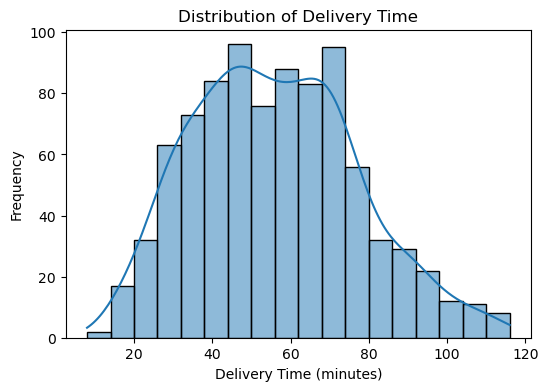

In [67]:
plt.figure(figsize=(6,4))
sns.histplot(df['Delivery_Time_min'], kde=True)
plt.title("Distribution of Delivery Time")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")
plt.show()


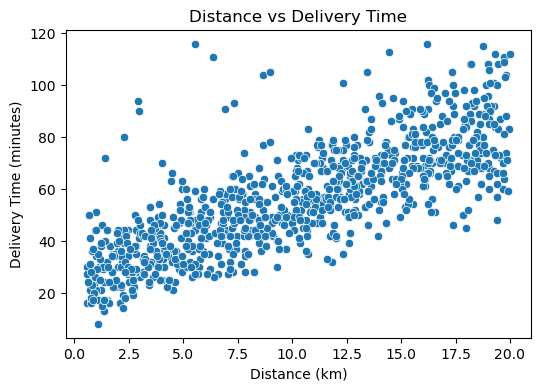

In [68]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Distance_km'], y=df['Delivery_Time_min'])
plt.title("Distance vs Delivery Time")
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (minutes)")
plt.show()


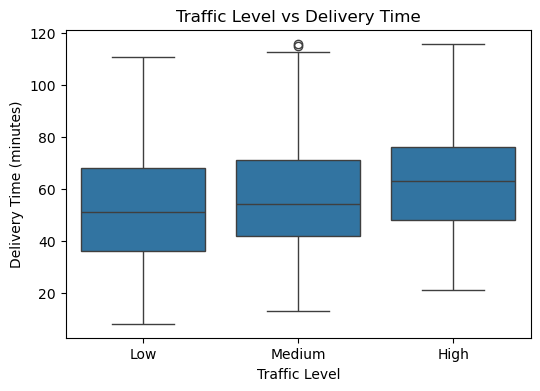

In [69]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Traffic_Level'], y=df['Delivery_Time_min'])
plt.title("Traffic Level vs Delivery Time")
plt.xlabel("Traffic Level")
plt.ylabel("Delivery Time (minutes)")
plt.show()


- Encode Categorical Variables

- Categorical columns:

    - Weather

    -  Traffic_Level

    - Time_of_Day

    - Vehicle_Type

In [70]:
le = LabelEncoder()

cat_cols = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

for col in cat_cols:
    df[col] = le.fit_transform(df[col])


## Feature & Target Separation

In [71]:
x=df.drop('Delivery_Time_min',axis=1)
y=df['Delivery_Time_min']

In [72]:
x.head()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs
0,7.93,4,1,0,2,12,1.0
1,16.42,0,2,1,0,20,2.0
2,9.52,1,1,3,2,28,1.0
3,7.44,2,2,0,2,5,1.0
4,19.03,0,1,2,0,16,5.0


- we have converted categorical columns into numerical by label encoding because it is regression problem and we have categorical columns that will helps us to determined distace so we transform it into numerical 
- then we do standerdization on it to scale the data in the range

## Train-test split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [74]:
X_train.shape

(703, 7)

In [75]:
X_test.shape

(176, 7)

- Feature scalling

In [76]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## model building

- Linear Regression

In [77]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

- Decission Tree Regressor

In [79]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)



DecisionTreeRegressor(random_state=42)

- Random Forest Regressor

In [80]:
rf = RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

## Model Evaluation

In [81]:
def evaluate_model(y_test, y_pred, model_name):
    print(model_name)
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2 Score:", r2_score(y_test, y_pred))
    print("-" * 40)


In [82]:
lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

evaluate_model(y_test, lr_pred, "Linear Regression")
evaluate_model(y_test, dt_pred, "Decision Tree")
evaluate_model(y_test, rf_pred, "Random Forest")


Linear Regression
MAE: 7.194756424734307
MSE: 103.8381724225369
RMSE: 10.19010168852779
R2 Score: 0.7592292238386472
----------------------------------------
Decision Tree
MAE: 10.142045454545455
MSE: 221.23295454545453
RMSE: 14.873901792920865
R2 Score: 0.4870245793461452
----------------------------------------
Random Forest
MAE: 6.801704545454546
MSE: 104.68705795454547
RMSE: 10.231669363038735
R2 Score: 0.7572609030983499
----------------------------------------


- Here Ramdom Forest model is the great fit for our delivery time prediction is less in all this 3

In [84]:
import joblib
joblib.dump(rf, "delivery_time_model.pkl")

['delivery_time_model.pkl']